# Interpolation of Cloud Atmosphere using scipy.interpolate.griddata

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from scipy.interpolate import griddata

## Creating a interpolation graph for cloud in atmosphere

> Using a cloud in an atmosphere

In [2]:
df_cloud_atm = pd.read_csv("../create_atm/atmospheres/cloud_atm_1-2.csv", header = None, index_col = 0)
N_cloud_atm = int(df_cloud_atm.shape[1]/2)

In [3]:
df2_cloud_atm = df_cloud_atm.T

In [4]:
effr_cloud = [4,8,10,16,20,32] 

In [5]:
dTau_range_cloud = []

for col in df2_cloud_atm.columns:
    dTau_range_cloud.append(col)

N_dTau_cloud = len(dTau_range_cloud)

# print(dTau_range_cloud)

In [6]:
df_index_log = np.log(df_cloud_atm.index)
# df_index_log

## Interpolating using griddata routine

### Effective Radius interpolation

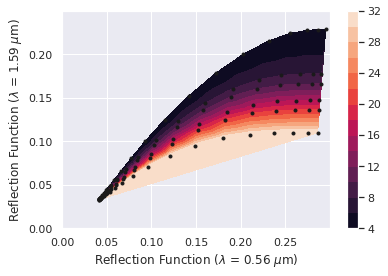

In [7]:
df2_numpy = df2_cloud_atm.to_numpy()

x_effr = df2_numpy[0]
for i in range(N_cloud_atm-1):
    x_effr = np.concatenate([x_effr, df2_numpy[i+1]])

y_effr = df2_numpy[N_cloud_atm]
for i in range(N_cloud_atm-1):
    y_effr = np.concatenate([y_effr, df2_numpy[i+1+N_cloud_atm]])

z_effr = np.concatenate([np.ones(N_dTau_cloud)*4, np.ones(N_dTau_cloud)*8, np.ones(N_dTau_cloud)*10, np.ones(N_dTau_cloud)*16, np.ones(N_dTau_cloud)*20, np.ones(N_dTau_cloud)*32])
z_effr = np.log(z_effr)

xi_effr = np.arange(0,0.3,0.0001)
yi_effr = np.arange(0,0.25,0.0001)
xi_effr,yi_effr = np.meshgrid(xi_effr,yi_effr)

zi_effr = griddata((x_effr,y_effr),z_effr,(xi_effr,yi_effr),method='linear')

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x_effr,y_effr,'k.')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$ = 1.59 $\mu$m)')
cntr1 = ax.contourf(xi_effr, yi_effr, np.exp(zi_effr), levels=14)

plt.colorbar(cntr1)
plt.show()

## Optical Depth Interpolation

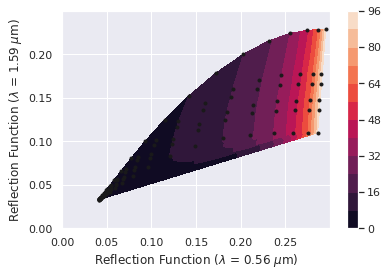

In [8]:
df_numpy = df_cloud_atm.to_numpy()

x_opd = df_numpy[0][0:N_cloud_atm]
for i in range(N_dTau_cloud-1):
    x_opd = np.concatenate([x_opd, df_numpy[i+1][0:N_cloud_atm]])

y_opd = df_numpy[0][N_cloud_atm:2*N_cloud_atm]
for i in range(N_dTau_cloud-1):
    y_opd = np.concatenate([y_opd, df_numpy[i+1][N_cloud_atm:2*N_cloud_atm]])

z_opd = np.ones(N_cloud_atm)*df_cloud_atm.index[0]
for i in range(N_dTau_cloud-1):
    z_opd = np.concatenate([z_opd, np.ones(N_cloud_atm)*df_cloud_atm.index[i+1]])

z_opd = np.log(z_opd)

xi_opd = np.arange(0,0.3,0.0001)
yi_opd = np.arange(0,0.25,0.0001)
xi_opd,yi_opd = np.meshgrid(xi_opd,yi_opd)

zi_opd = griddata((x_opd,y_opd),z_opd,(xi_opd,yi_opd),method='linear')

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.contourf(xi,yi,zi) # np.arange(0.18,0.2,0.001)
plt.plot(x_opd,y_opd,'k.')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$ = 1.59 $\mu$m)')
cntr1 = ax.contourf(xi_opd, yi_opd, np.exp(zi_opd), levels=14)

plt.colorbar(cntr1)
plt.show()

# Investigating Changing Height of the Cloud

In [51]:
df_cloud_0 = pd.read_csv("../create_atm/atmospheres/cloud_atm_0-1.csv", header = None, index_col = 0)

In [52]:
df2_cloud_0 = df_cloud_0.T

In [53]:
df2_numpy_0 = df2_cloud_0.to_numpy()

xi_effr_0 = df2_numpy_0[0]
for i in range(N_cloud_atm-1):
    xi_effr_0 = np.concatenate([xi_effr_0, df2_numpy_0[i+1]])

yi_effr_0 = df2_numpy_0[N_cloud_atm]
for i in range(N_cloud_atm-1):
    yi_effr_0 = np.concatenate([yi_effr_0, df2_numpy_0[i+1+N_cloud_atm]])



In [54]:
zi_effr_0 = griddata((x_effr,y_effr),z_effr,(xi_effr_0,yi_effr_0),method='linear')

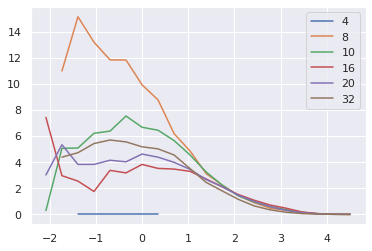

In [55]:
for i in range(N_cloud_atm):
    y = np.abs(np.exp(zi_effr_0[20*i:20*i+20])-effr_cloud[i])*100/effr_cloud[i]
    plt.plot(np.log(dTau_range_cloud), y)
    plt.legend(effr_cloud)

In [56]:
dTau_range_cloud

[0.125,
 0.1767766952966369,
 0.25,
 0.3535533905932738,
 0.5,
 0.7071067811865476,
 1.0,
 1.4142135623730951,
 2.0,
 2.8284271247461903,
 4.0,
 5.656854249492381,
 8.0,
 11.31370849898476,
 16.0,
 22.62741699796952,
 32.0,
 45.254833995939045,
 64.0,
 90.50966799187808]